In [ ]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8081%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=KvGYhD0ruZLMzWrgbuoEsiUeClHLIK&access_type=offline


In [ ]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,90,3,4,2,3,4,3.2,0.64
1,177,3,3,3,3,1,2.6,0.52
2,124,3,3,3,3,3,3.0,0.60
3,171,3,3,3,3,3,3.0,0.60
4,285,3,3,2,3,4,3.0,0.60


In [ ]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,258,3,1,1,1,1,1.5,0.3
1,19,1,1,1,1,1,1.0,0.2
2,81,1,1,1,1,1,1.0,0.2
3,171,3,1,3,1,3,2.0,0.4
4,323,1,1,1,1,1,1.0,0.2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,168,1,0,1,1,1
2,174,0,0,1,1,2
3,103,0,0,1,1,2
4,8,0,0,2,1,1
...,...,...,...,...,...,...
348,217,2,6,2,1,2
349,343,2,6,2,2,1
350,77,0,6,2,1,2
351,151,2,6,3,2,2


In [ ]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']

df1.head()

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,119,0,0,0,0,1,4.6,3.0
1,168,1,0,1,1,1,3.4,2.5
2,174,0,0,1,1,2,3.4,3.5
3,103,0,0,1,1,2,3.4,3.5
4,8,0,0,2,1,1,4.0,2.75


In [ ]:
import numpy as np
import pandas as pd

bins = [0, 2.33, 3.64, 5]
df1['Acd_score_group'] = np.digitize(df1['Acd_score'], bins)

df1.head()

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score,Acd_score_group
0,119.0,0.0,0.0,0.0,0.0,1.0,4.6,3.00,2
1,168.0,1.0,0.0,1.0,1.0,1.0,3.4,2.50,2
2,174.0,0.0,0.0,1.0,1.0,2.0,3.4,3.50,2
3,103.0,0.0,0.0,1.0,1.0,2.0,3.4,3.50,2
4,8.0,0.0,0.0,2.0,1.0,1.0,4.0,2.75,2


In [ ]:
bins = [0, 2.33, 3.64, 5]
labels = [1, 2, 3]
df1['Acd_score_group'] = pd.cut(df1['Acd_score'], bins=bins, labels=labels)

In [ ]:
df1=df1.astype('float')
X=df1.drop(['ID','Acd_score','Acd_score_group'],axis=1)
y=df1['Acd_score_group']

In [ ]:
print(df1['Acd_score_group'].unique())
print(df1['Acd_score_group'].value_counts())

[2. 3. 1.]
2.0    179
1.0     97
3.0     77
Name: Acd_score_group, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
y_train

211    2.0
163    2.0
221    2.0
36     3.0
131    2.0
      ... 
190    2.0
325    3.0
120    2.0
275    2.0
298    2.0
Name: Acd_score_group, Length: 282, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert the target values to integers for classification
y_train_classes = y_train.astype('int')
y_test_classes = y_test.astype('int')

# Define the parameter grid for the classifier
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict_with_labels = {k+1: v for k, v in class_weights_dict.items()}


# Initialize the classifier and the grid search
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict_with_labels)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Fit the classifier to the training data using grid search
grid_search.fit(X_train, y_train_classes)

# Print the best hyperparameters and the best score
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best score: {:.5f}".format(grid_search.best_score_))

# Get the predicted classes for the test set
y_pred_classes = grid_search.predict(X_test)



Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
Best score: 0.48578


In [ ]:
class_weights_dict_with_labels

{1: 1.2130584192439862, 2: 0.6573556797020484, 3: 1.5281385281385282}

Accuracy: 0.49296
Precision: 0.5288111019055509
Recall: 0.49295774647887325
F1 score: 0.4988852939955784


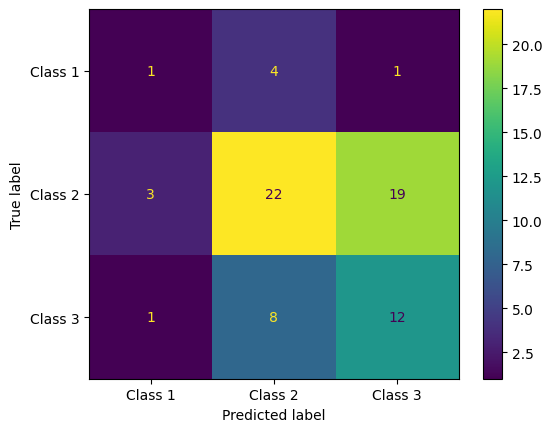

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 score: {}".format(f1))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 1','Class 2','Class 3'])
disp.plot()
plt.show()